### Define Weight Function

+ $A = (a_1, a_2, \dots, a_m)$, $B = (b_1, b_2, \dots, b_n)$, without loss of generality, assuming $m >= n$.

+ Modified Logistic Weights for ($a_i$, $b_j$)
    + **Relative Position**
        $$w_{i,j}^r = \frac{w_{\max}}{1+\exp(-g(|i-j|-m_c)}=\frac{w_{\max}}{1+\exp(-g\cdot |i-j|)\cdot\exp(g\cdot m_c)}$$
        where $w_{max}=1$ and $m_c=m/2$.
        + This is a weight implying the penalty for matching two points from different time periods. 
        + The bigger the phase difference $|i-j|$ between the two points are away from each other, the large the weights.
        + If two time points are close to each other, then lower penalty is added
    
    + **Absolute Position**
        $$w_{i,j}^a = \frac{w_{\max}}{1+\exp(-g(i-m_c))}=\frac{w_{\max}}{1+\exp(-g\cdot i)\cdot\exp(g\cdot m_c)}$$
        where $w_{max}=1$ and $m_c=m/2$.
        
    + **How to Combine Two Weights**
        1. Harmonic Mean (non-monotonic graph implies this is a bad idea)
            $$w_{i,j}=\frac{2}{1/w_{i,j}^r + 1/w_{i,j}^a}$$
        2. Based on relative-position weights find the best path and apply absolute-position weights to the best path: ``Time-dependent Modified Logistic Weight Function (TDMLWF)`` 

In [2]:
# Define weight function - relative and absolute
weight_fcn <- function(i, j, m, type, g = 0.1, w_max = 1) {
    
    if (!type %in% c("relative", "absolute")) {
        stop("Type should be either 'relative' or 'absolute'")
    }
    
    m_c <- round(m/2, 0)
    idx_diff <- (type == "relative") * abs(i-j) + (type == "absolute") * i
    weight <- w_max / (1 + exp(-g *(idx_diff - m_c)) )
    return(weight)
    
}

In [3]:
# Define modified logistic weight function by adding time-dependent weights: most recent time will get higher weights 
weight_fcn_prod <- function(i, j, m, type = 'relative', g = 0.1, w_max = 1) {

    m_c <- round(m/2, 0)
    weight <- sqrt(w_max / (1 + exp(-g *(abs(i-j) - m_c)) ) * w_max / (1 + exp(-g *(i - m_c))))
    return(weight)

}

If $j$ is fixed, then the __Absolute MLWF__ is a __monotoncally increasing__ function w.r.t. $i$, while the __Relative MLWF__ is a symmetric function with the global minimum reached when the phase difference $|i-j|$ is equal to 0. As the phase difference increases, the weight increases. No phase difference is accounted in Absolute MLWF.

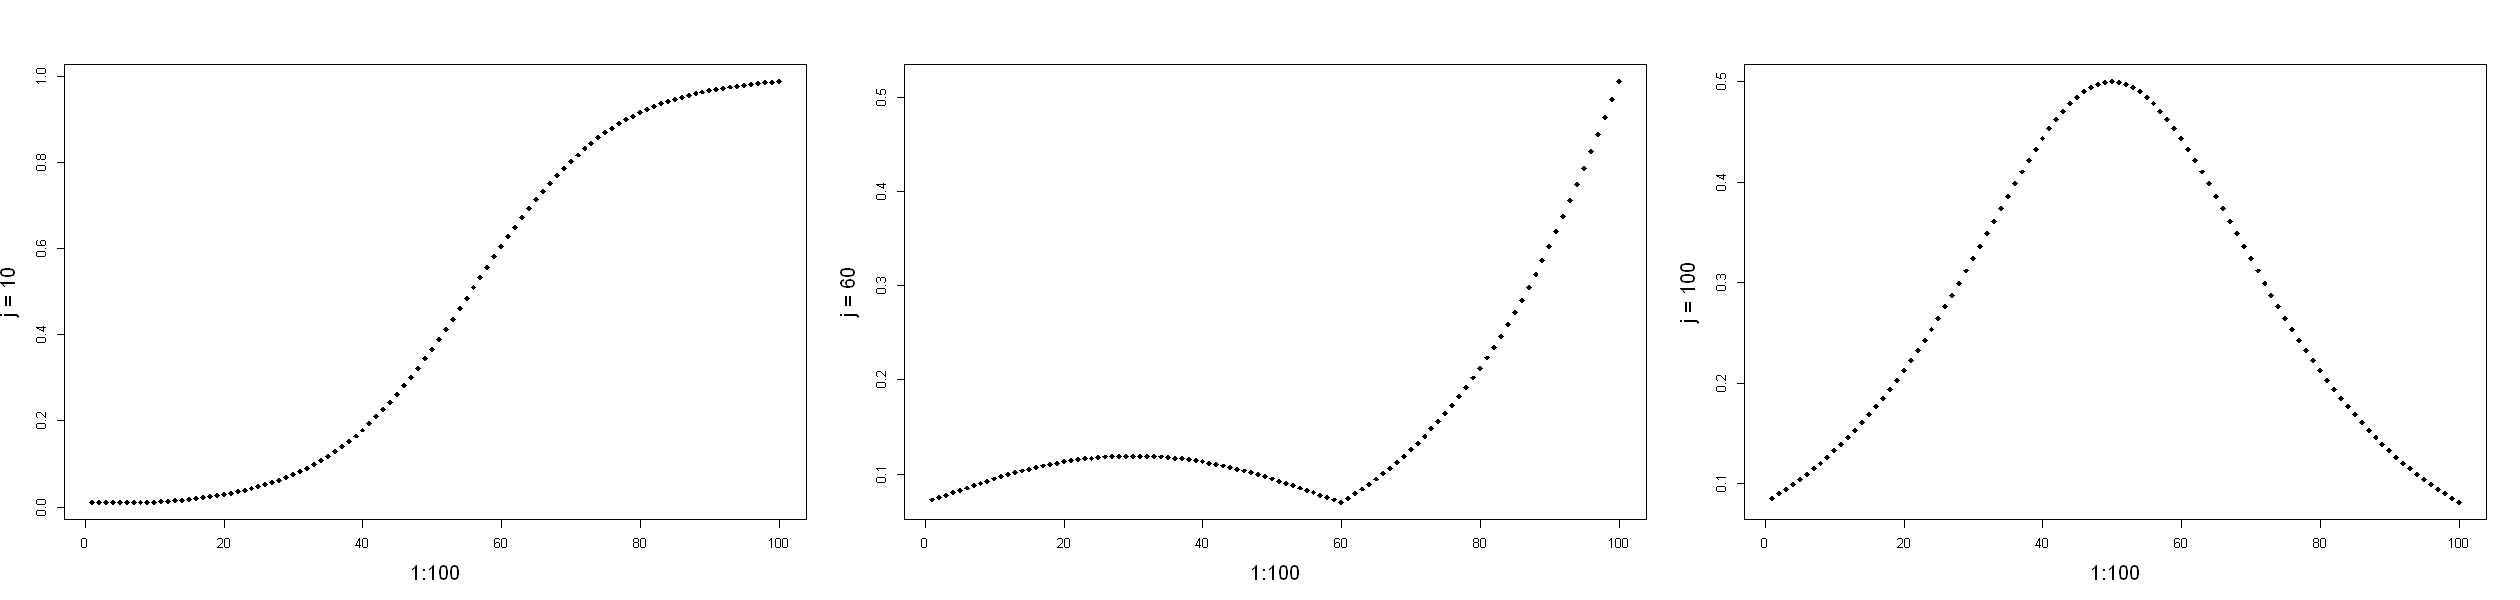

In [4]:
# Time-dependent MLWF
par(mfrow = c(1,3)) 
options(repr.plot.width = 21, repr.plot.height = 5)
tmp_w_a_10 <- sapply(c(1:100), function (x) weight_fcn_prod(x, 10, 100))
tmp_w_a_60 <- sapply(c(1:100), function (x) weight_fcn_prod(x, 60, 100))
tmp_w_a_100 <- sapply(c(1:100), function (x) weight_fcn_prod(x, 100, 100))
plot(1:100, tmp_w_a_10, pch = 18, ylab = "j = 10", cex.lab = 1.5)
plot(1:100, tmp_w_a_60, pch = 18, ylab = "j = 60", cex.lab = 1.5)
plot(1:100, tmp_w_a_100, pch = 18, ylab = "j = 100", cex.lab = 1.5)

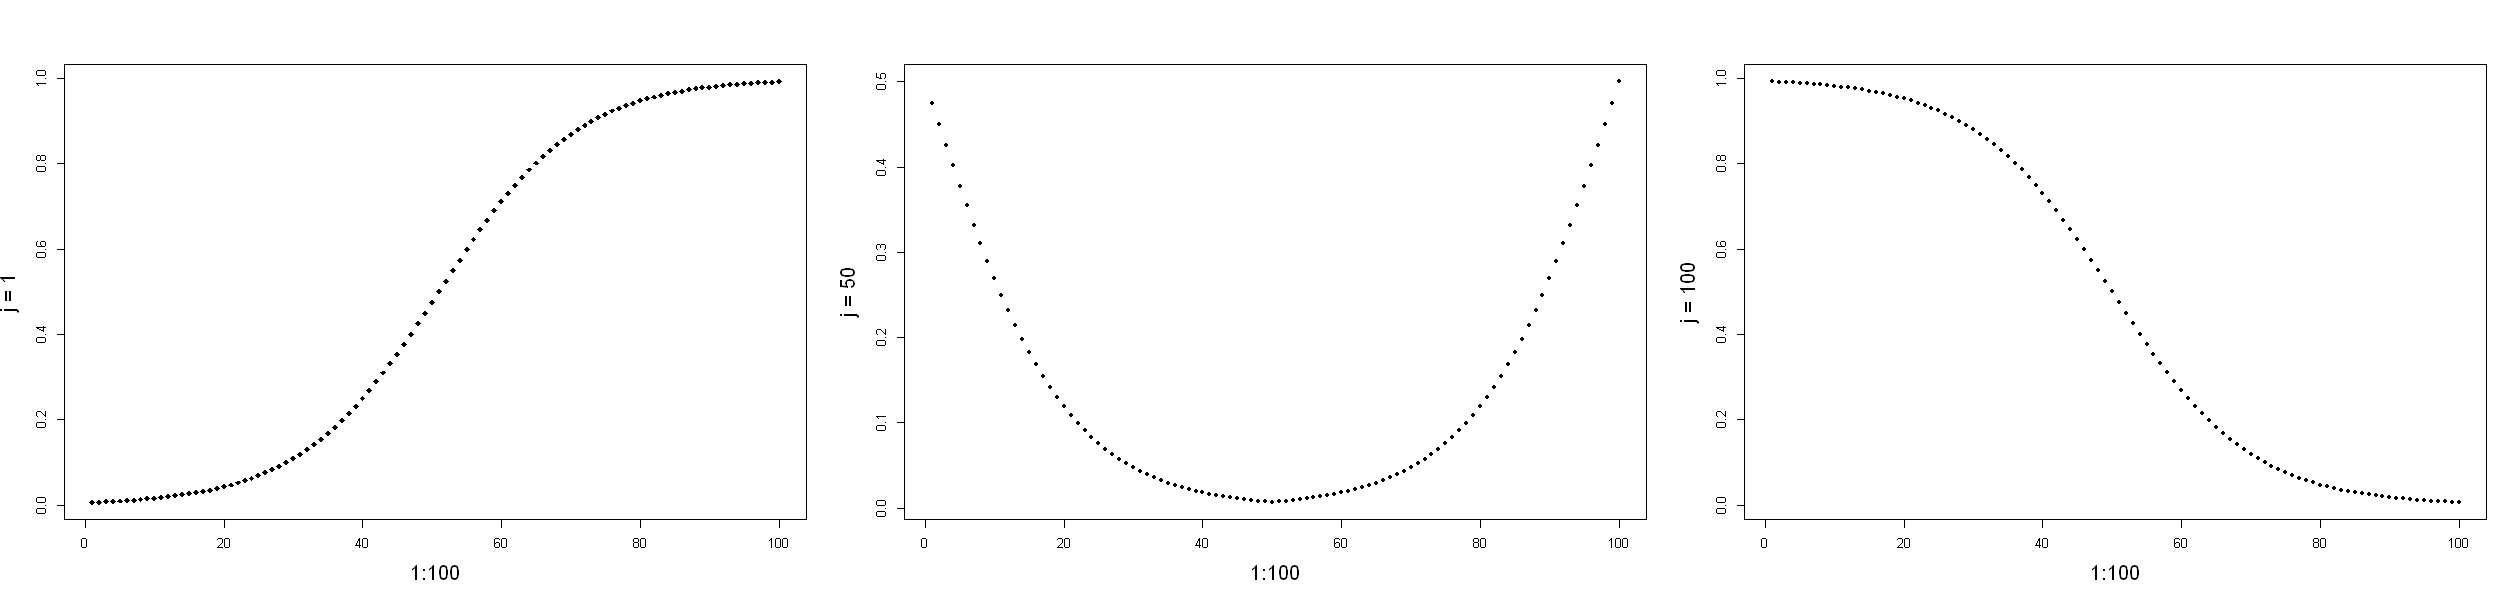

In [5]:
par(mfrow = c(1,3)) 
options(repr.plot.width = 21, repr.plot.height = 5)
tmp_w_r_1 <- sapply(c(1:100), function (x) weight_fcn(x, 1, 100, type = "relative"))
tmp_w_r_50 <- sapply(c(1:100), function (x) weight_fcn(x, 50, 100, type = "relative"))
tmp_w_r_100 <- sapply(c(1:100), function (x) weight_fcn(x, 100, 100, type = "relative"))
plot(1:100, tmp_w_r_1, pch = 18, ylab = "j = 1", cex.lab = 1.5)
plot(1:100, tmp_w_r_50, pch = 20, ylab = "j = 50", cex.lab = 1.5)
plot(1:100, tmp_w_r_100, pch = 20, ylab = "j = 100", cex.lab = 1.5)

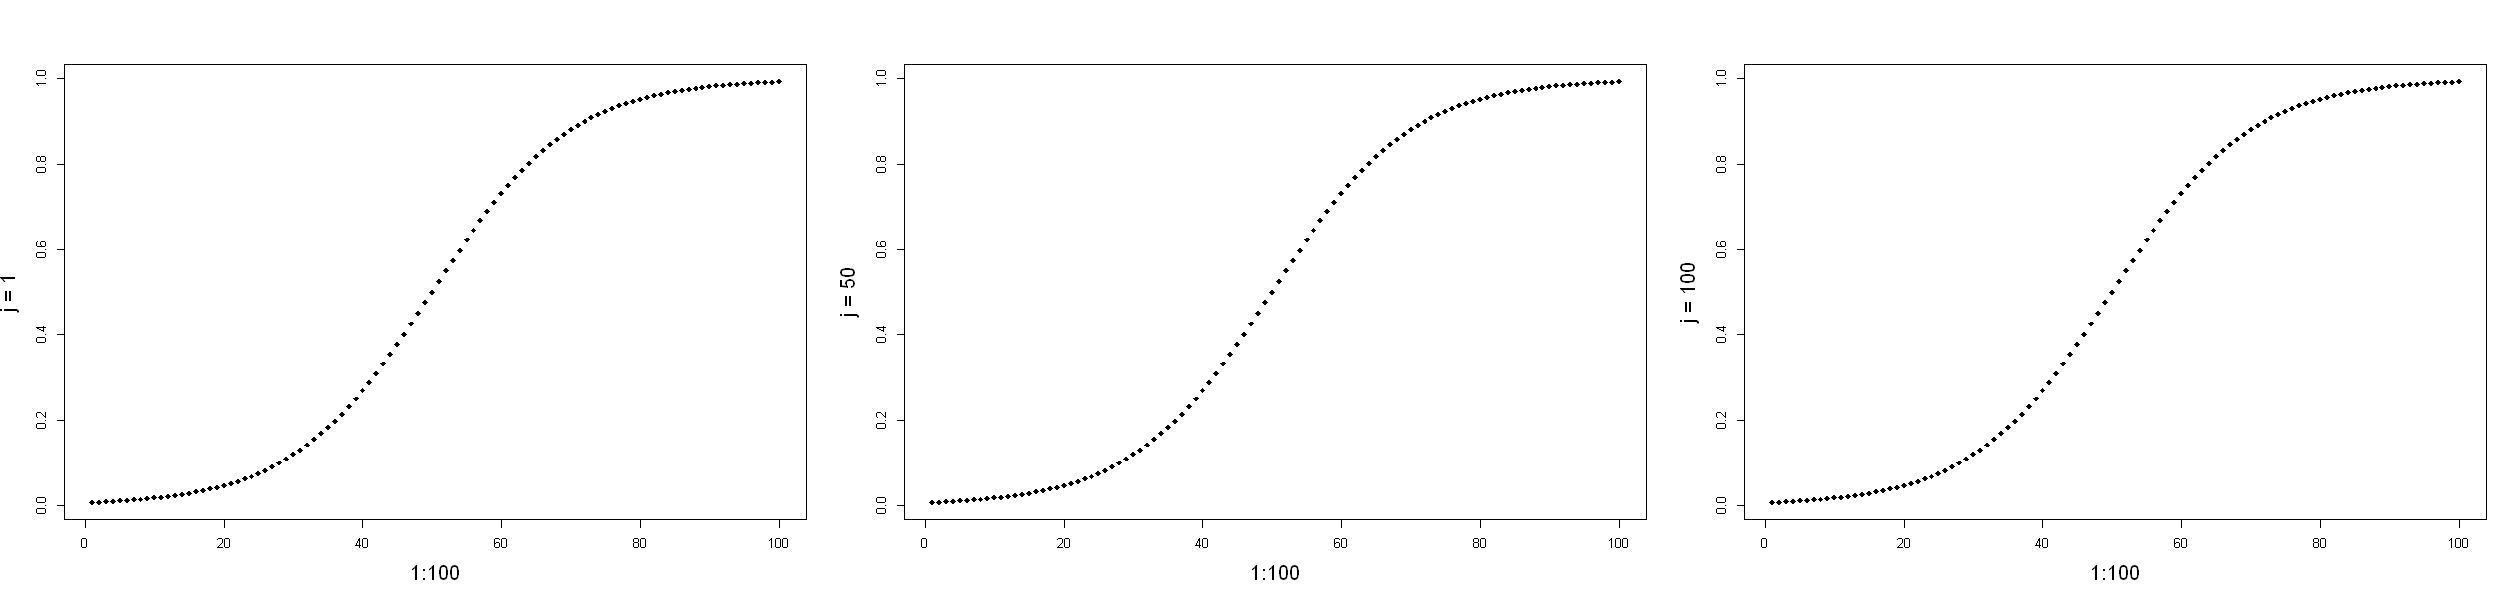

In [6]:
# Absolute positon weight - no related to the value of j
# Monotonically increasing function of i
par(mfrow = c(1,3)) 
options(repr.plot.width = 21, repr.plot.height = 5)
tmp_w_a_1 <- sapply(c(1:100), function (x) weight_fcn(x, 1, 100, type = "absolute"))
tmp_w_a_50 <- sapply(c(1:100), function (x) weight_fcn(x, 50, 100, type = "absolute"))
tmp_w_a_100 <- sapply(c(1:100), function (x) weight_fcn(x, 100, 100, type = "absolute"))
plot(1:100, tmp_w_a_1, pch = 18, ylab = "j = 1", cex.lab = 1.5)
plot(1:100, tmp_w_a_50, pch = 18, ylab = "j = 50", cex.lab = 1.5)
plot(1:100, tmp_w_a_100, pch = 18, ylab = "j = 100", cex.lab = 1.5)


#### Harmonic Mean for Two Types of Weights (Bad!!!)

This is not a good idea to combine two types of weights using harmonic mean. The harmonic mean shows non-monotonic trend, which is bad as a weight metric.

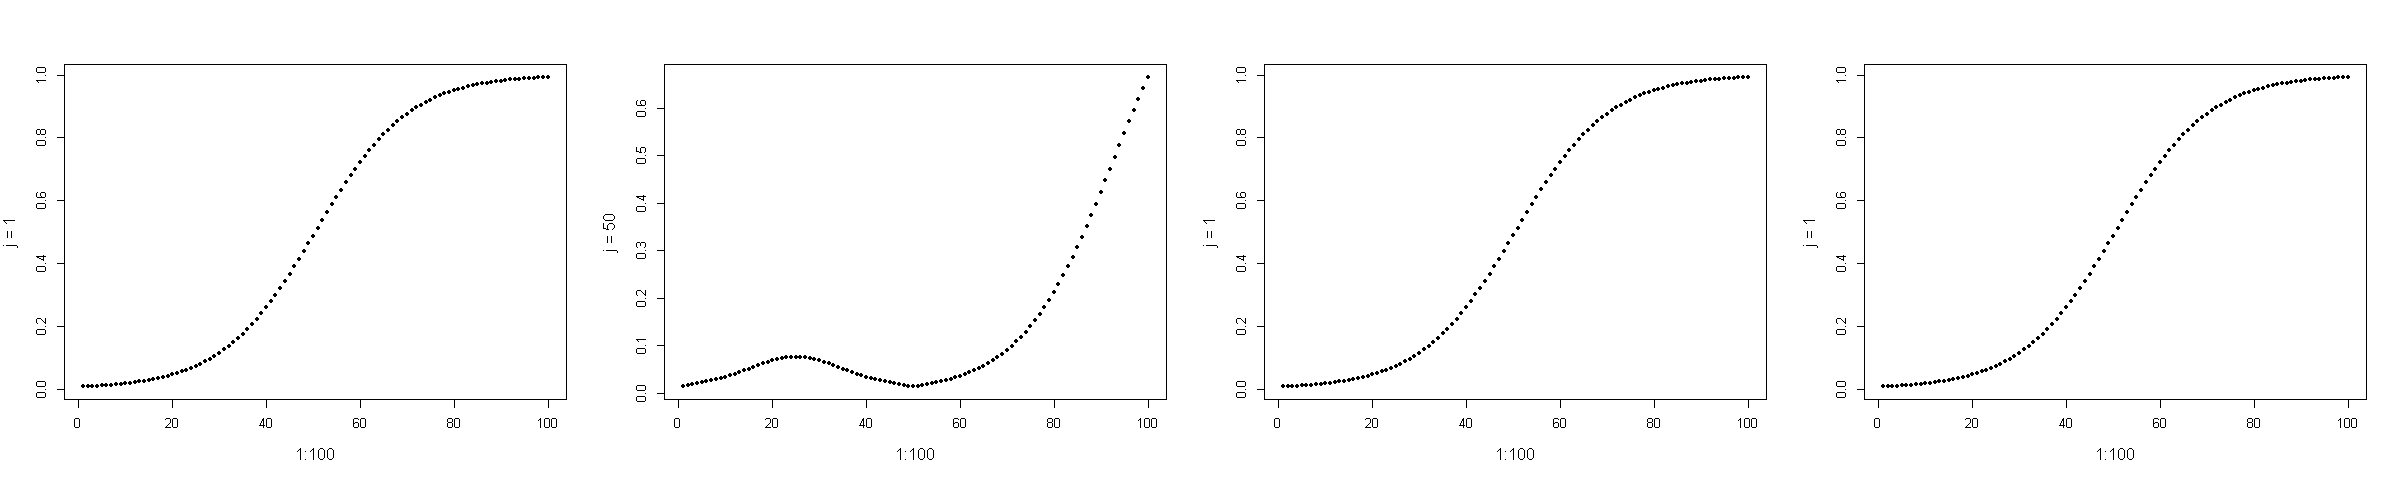

In [20]:
par(mfrow = c(1,4)) 
options(repr.plot.width = 20, repr.plot.height = 4)
plot(1:100, 2/(1/tmp_w_a_1+1/tmp_w_r_1), pch = 20, ylab = "j = 1", cex.lab = 1.2)
plot(1:100, 2/(1/tmp_w_a_50+1/tmp_w_r_50), pch = 20, ylab = "j = 50", cex.lab = 1.2)
plot(1:100, sqrt((tmp_w_a_1^2 + tmp_w_r_1^2)/2), pch = 20, ylab = "j = 1", cex.lab = 1.2)
plot(1:100, sqrt(tmp_w_a_1*tmp_w_r_1), pch = 20, ylab = "j = 1", cex.lab = 1.2)

#### Modified Logistic Weight Function

As $w_{|i-j|}$ becomes smaller,i.e., $g$ becomes larger, for the points in nearer phase $|i-j|$, WDTW will be closer to Euclidean distance because it does not allow non-linear alignments of one point to another. By choosing the appropriate $g$ value, WDTW can achieve improved performance in diverse situations.

In [21]:
mlwf <- function(d, m, g = 0.1, w_max = 1) {

    m_c <- round(m/2, 0)
    weight <- w_max / (1 + exp(-g *(d- m_c)) )
    return(weight)
    
}

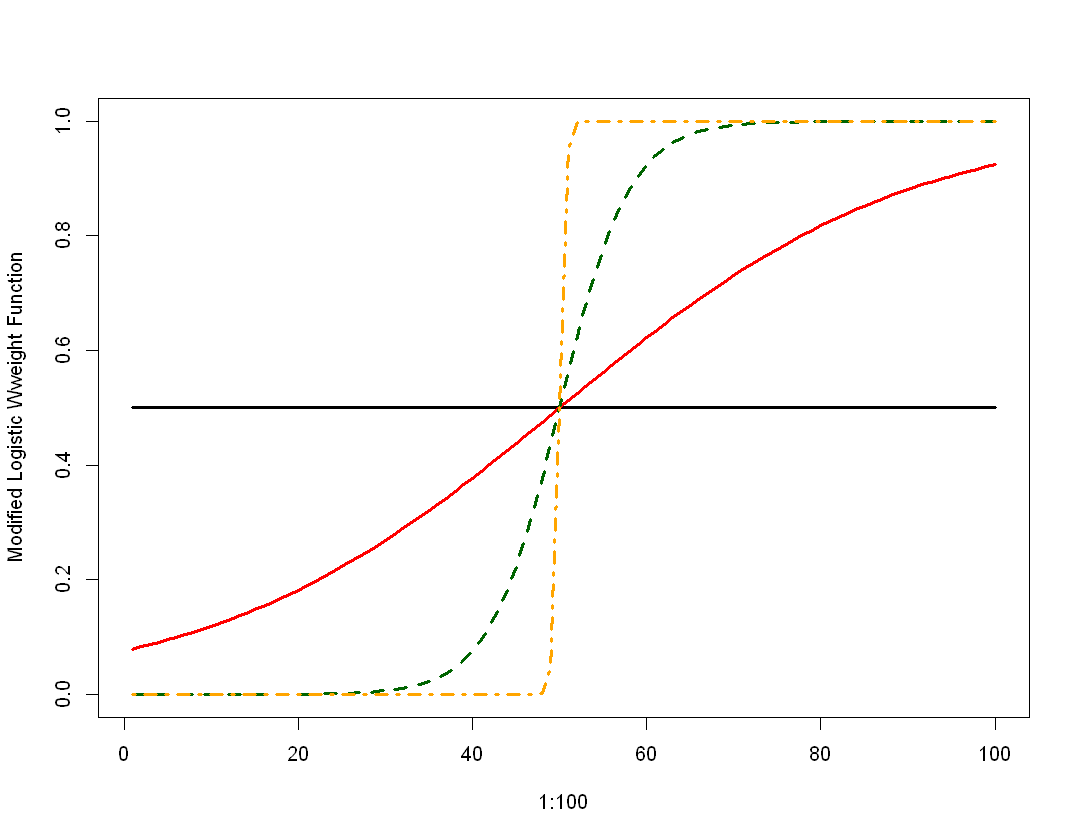

In [22]:
mlwf_0 <- sapply(c(1:100), function (x) mlwf(x, 10, g = 0.0))
mlwf_1 <- sapply(c(1:100), function (x) mlwf(x, 100, g = 0.05))
mlwf_2 <- sapply(c(1:100), function (x) mlwf(x, 100, g = 0.25))   
mlwf_3 <- sapply(c(1:100), function (x) mlwf(x, 100, g = 3))

options(repr.plot.width = 9, repr.plot.height = 7)
plot(1:100, mlwf_0, type = "l", lwd = 3, ylim = c(0,1), ylab = "Modified Logistic Wweight Function")
lines(1:100, mlwf_1, type = "l", col ="red", pch = 19, lwd = 3)
lines(1:100, mlwf_2, type = "l", col = "darkgreen", pch = 19, lwd = 3, lty = 2)
lines(1:100, mlwf_3, type = "l", col = "orange", pch = 19, lwd = 3, lty = 4)